In [1]:
import numpy as np
import matplotlib.pyplot as plt

xxxxx

In [2]:
def sst(T, h):
    return (R*T + gama*h-epsilon*(h+b*T)**3 + gama* xi)
def thermo(T,h):
    return (-r*h -alpha*b*T-alpha*xi)

In [3]:
def rungeKutta(T,h):
    "Apply Runge Kutta Formulas to find next value of T and h"
    k1 =  sst(T, h)
    kk1 =  thermo(T, h)
    
    k2 =  sst(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    kk2 = thermo(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    
    k3 =  sst(T + dt*0.5 * k2, h + dt*0.5 *kk2  )
    kk3 = thermo(T + dt*0.5 * k2, h + dt*0.5 * kk2 )
    
    k4 = sst(T + dt*k3, h + dt*kk3 )
    kk4 = thermo(T + dt*k3, h + dt*kk3 )
    # Update next value of T
    T = T + (1.0 / 6.0)*dt*(k1 + 2 * k2 + 2 * k3 + k4)
    # Update next value of h
    h = h + (1.0 / 6.0)*dt*(kk1 + 2 * kk2 + 2 * kk3 + kk4)
    return T,h

# Task A

In [4]:
T0=1.125/7.5
h0=0
T= T0
h = h0
time =120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years
b0=2.5
mu=2/3
gama=0.75
c=1
b=b0*mu
R=gama * b - c
r = 0.25
alpha = 0.125
epsilon=0   # no nonlinearity
xi=0  # no forcing 

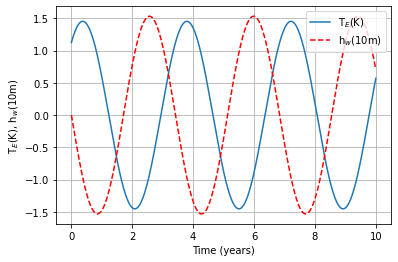

In [5]:
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")
plt.xlabel("Time (years)")
plt.ylabel("T$_E$(K), h$_w$(10m)")
plt.legend(loc="upper right")
plt.grid()

The time series for the SST anomaly(in K, solid line) and thermocline depth in the western Pacific (in 10 m, dashed line) 

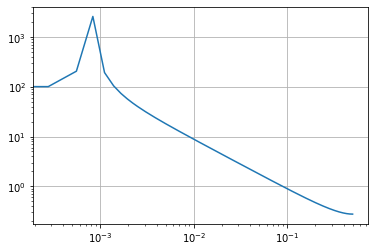

In [6]:
data=np.array(T_arr)*7.5
ft = np.fft.rfft(data)
freqs = np.fft.rfftfreq(len(data), 1) # Get frequency axis from the time axis
mags = abs(ft) 
#plt.plot(freqs[0:10], mags[0:10])
plt.grid()
plt.loglog(freqs, mags)

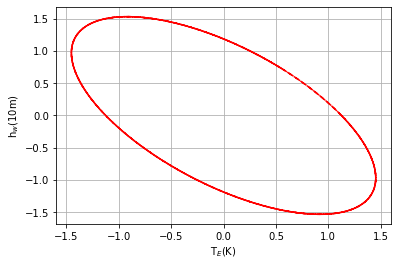

In [7]:
plt.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
plt.xlabel("T$_E$(K)")
plt.ylabel("h$_w$(10m)")
plt.grid()

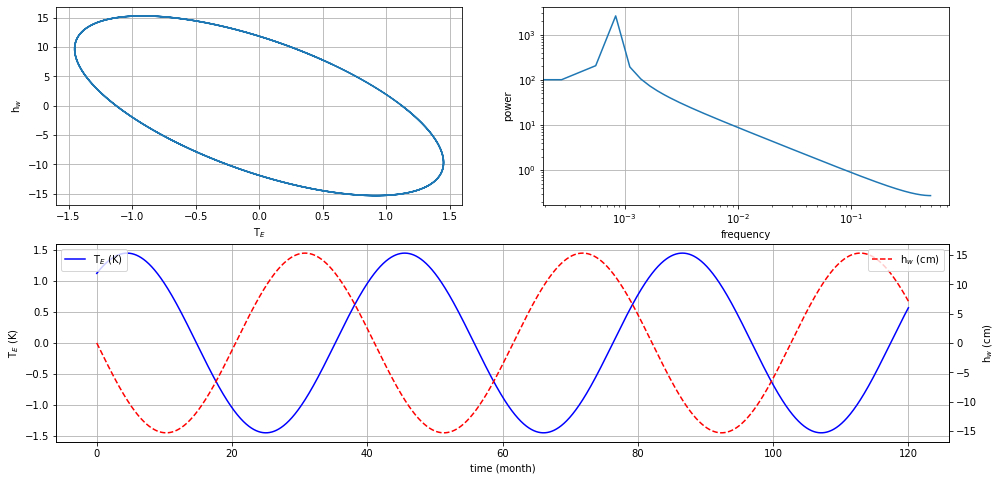

In [8]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(212)
ax.set_xlabel("time (month)")
ax.set_ylabel("T$_E$ (K)")
ax2 = ax.twinx()
ax2.plot(xlim*2, np.array(h_arr)*150,'r--',label="h$_w$ (cm)")
ax.plot(xlim*2, np.array(T_arr)*7.5,'b',label="T$_E$ (K)")
ax2.set_ylabel("h$_w$ (cm)")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
#ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
ax.grid()

ax3 = fig.add_subplot(221)
ax3.plot(np.array(T_arr)*7.5,np.array(h_arr)*150)
ax3.set_xlabel("T$_E$")
ax3.set_ylabel("h$_w$")
ax3.grid()

ax4 = fig.add_subplot(222)
ax4.loglog(freqs, mags)
ax4.set_xlabel("frequency")
ax4.set_ylabel("power")
ax4.grid()

Text(0.5, 0.98, 'Harmonic Oscillator ($\\mu$=2/3)')

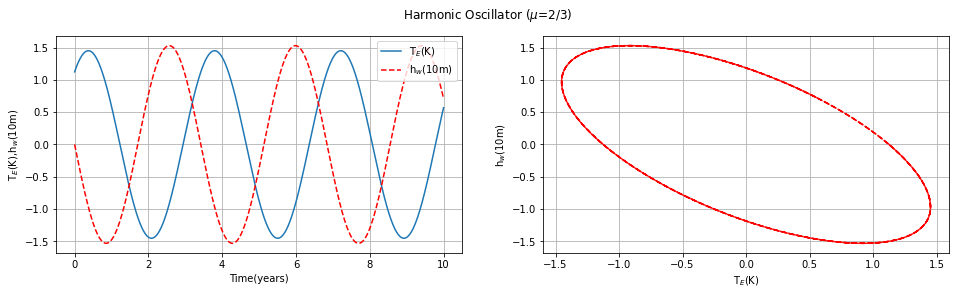

In [9]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax1.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
ax1.plot(xlim*2/12, np.array(h_arr)*15,'--',color='red',label="h$_w$(10m)")
ax1.set_xlabel("Time(years)")
ax1.set_ylabel("T$_E$(K),h$_w$(10m)")
ax1.legend(loc="upper right")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
ax2.set_xlabel("T$_E$(K)")
ax2.set_ylabel("h$_w$(10m)")
ax2.grid()
fig.suptitle('Harmonic Oscillator ($\mu$=2/3)')

# TaskB

## mu > 2/3

In [10]:
mu=0.7
b=b0*mu
R=gama * b - c
T=T0
h=h0
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)

## leads to instability when (R-r)/2 > 0

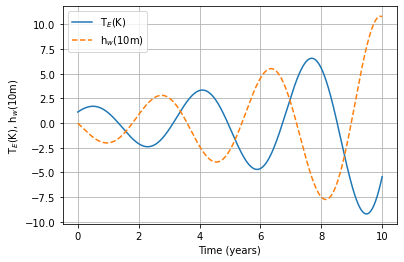

In [11]:
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$(10m)")
plt.xlabel("Time (years)")
plt.ylabel("T$_E$(K), h$_w$(10m)")
plt.grid()
plt.legend()

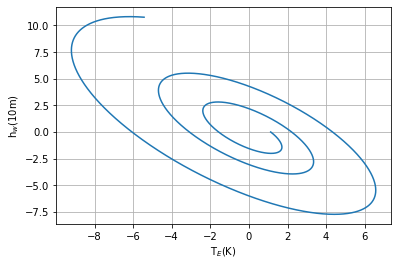

In [12]:
plt.plot(np.array(T_arr)*7.5,np.array(h_arr)*15)
plt.xlabel("T$_E$(K)")
plt.ylabel("h$_w$(10m)")
plt.grid()

Text(0.5, 0.98, 'Growing Oscillator ($\\mu$=0.7)')

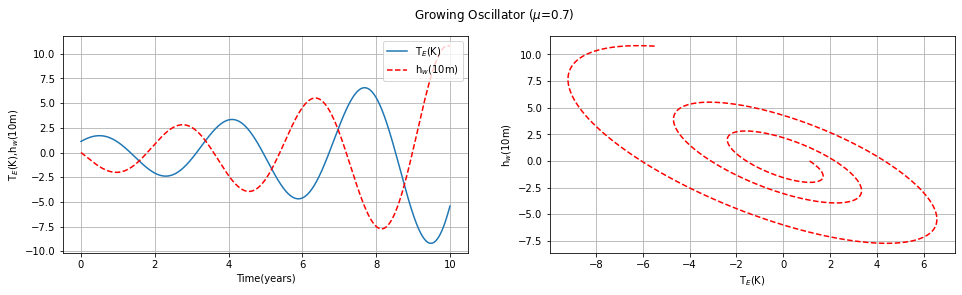

In [13]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax1.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
ax1.plot(xlim*2/12, np.array(h_arr)*15,'--',color='red',label="h$_w$(10m)")
ax1.set_xlabel("Time(years)")
ax1.set_ylabel("T$_E$(K),h$_w$(10m)")
ax1.legend(loc="upper right")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
ax2.set_xlabel("T$_E$(K)")
ax2.set_ylabel("h$_w$(10m)")
ax2.grid()
fig.suptitle('Growing Oscillator ($\mu$=0.7)')

## mu < 2/3

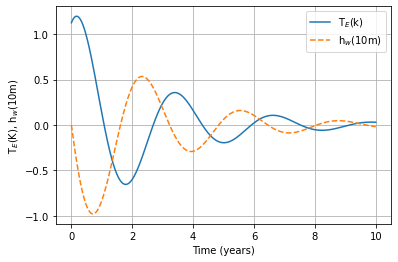

In [14]:
T=T0
h=h0
mu=0.6
b=b0*mu
R=gama * b - c
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(k)")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$(10m)")
plt.xlabel("Time (years)")
plt.ylabel("T$_E$(K), h$_w$(10m)")
plt.grid()
plt.legend()

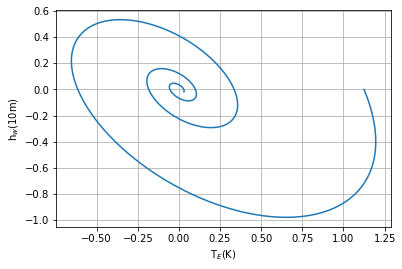

In [15]:
plt.plot(np.array(T_arr)*7.5,np.array(h_arr)*15)
plt.xlabel("T$_E$(K)")
plt.ylabel("h$_w$(10m)")
plt.grid()

Text(0.5, 0.98, 'Damping Oscillator ($\\mu$=0.6)')

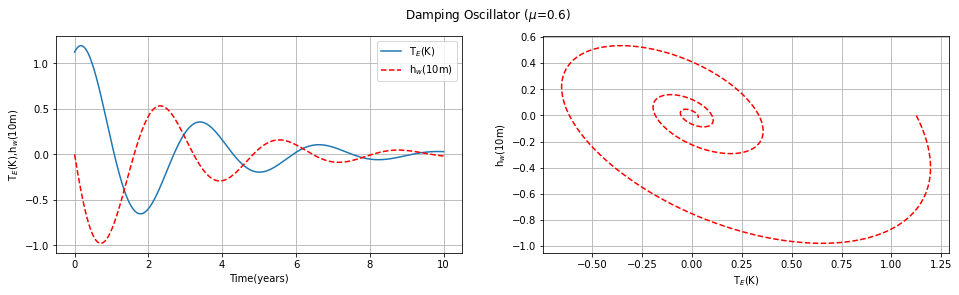

In [16]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax1.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
ax1.plot(xlim*2/12, np.array(h_arr)*15,'--',color='red',label="h$_w$(10m)")
ax1.set_xlabel("Time(years)")
ax1.set_ylabel("T$_E$(K),h$_w$(10m)")
ax1.legend(loc="upper right")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
ax2.set_xlabel("T$_E$(K)")
ax2.set_ylabel("h$_w$(10m)")
ax2.grid()
fig.suptitle('Damping Oscillator ($\mu$=0.6)')

# Task C Turn on nonlinearity by setting ε = 0.1.

In [17]:
T=T0
h=h0
mu= 0.7
b=b0*mu
R=gama * b - c
epsilon=0.6
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)

Text(0, 0.5, 'T$_E$, h$_w$')

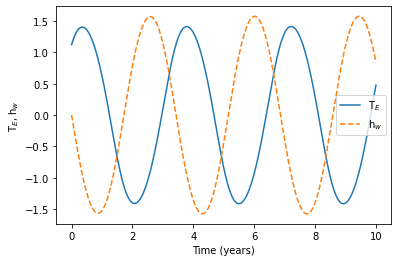

In [18]:
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$")
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("T$_E$, h$_w$")


Text(0, 0.5, 'h$_w$')

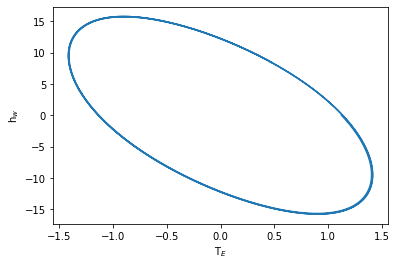

In [19]:
plt.plot(np.array(T_arr)*7.5,np.array(h_arr)*150)
plt.xlabel("T$_E$")
plt.ylabel("h$_w$")

Text(0.5, 0.98, 'Turn on nonlinearity ($\\mu$=0.7)')

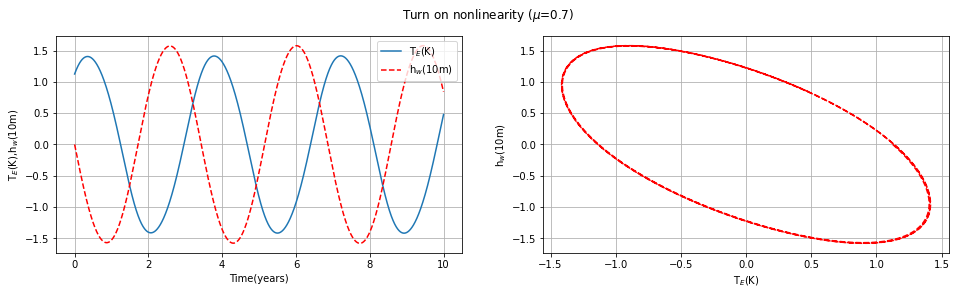

In [20]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax1.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
ax1.plot(xlim*2/12, np.array(h_arr)*15,'--',color='red',label="h$_w$(10m)")
ax1.set_xlabel("Time(years)")
ax1.set_ylabel("T$_E$(K),h$_w$(10m)")
ax1.legend(loc="upper right")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
ax2.set_xlabel("T$_E$(K)")
ax2.set_ylabel("h$_w$(10m)")
ax2.grid()
fig.suptitle('Turn on nonlinearity ($\mu$=0.7)')

# increase mu and compare with task B

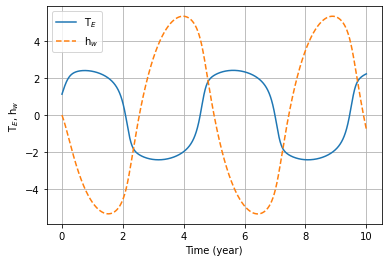

In [21]:
T=T0
h=h0
mu= 16/15
b=b0*mu
R=gama * b - c
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$")
plt.legend()
plt.xlabel("Time (year)")
plt.ylabel("T$_E$, h$_w$")
plt.grid()


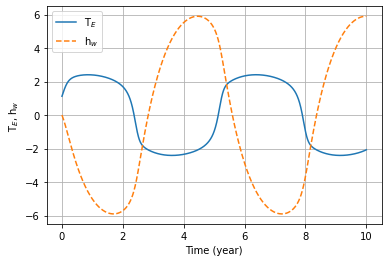

In [22]:
T=T0
h=h0
mu= 17/15
b=b0*mu
R=gama * b - c
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$")
plt.legend()
plt.xlabel("Time (year)")
plt.ylabel("T$_E$, h$_w$")
plt.grid()

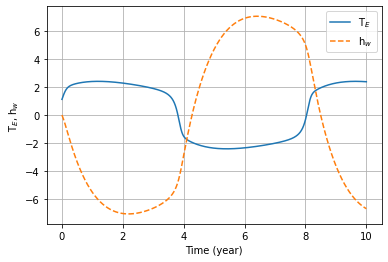

In [23]:
T=T0
h=h0
mu= 19/15
b=b0*mu
R=gama * b - c
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$")
plt.legend()
plt.xlabel("Time (year)")
plt.ylabel("T$_E$, h$_w$")
plt.grid()

Text(0.5, 1.0, '$\\mu$ in extreme regime')

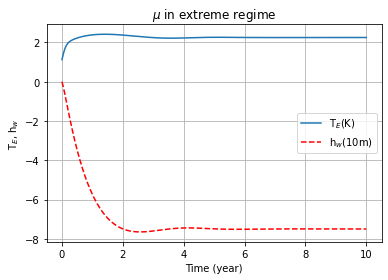

In [24]:
T=T0
h=h0
mu= 20/15
b=b0*mu
R=gama * b - c
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")
plt.legend()
plt.xlabel("Time (year)")
plt.ylabel("T$_E$, h$_w$")
plt.grid()
plt.title("$\mu$ in extreme regime")


# Task D  add wind forcing with an annual cycle

In [25]:
T=T0
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]  
for i in range(0, n ):
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao)
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)

Text(0, 0.5, 'T$_E$, h$_w$')

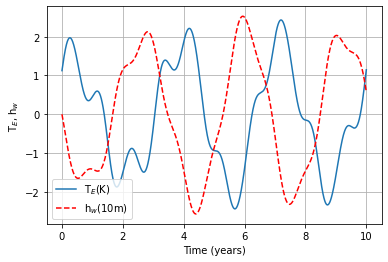

In [26]:
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")
plt.legend()
plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T$_E$, h$_w$")

Text(0, 0.5, 'h$_w$')

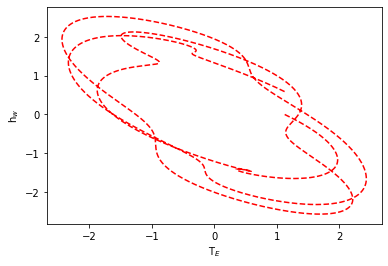

In [27]:
plt.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color="red")
plt.xlabel("T$_E$")
plt.ylabel("h$_w$")

Text(0.5, 0.98, 'wind forcing with an annual cycle')

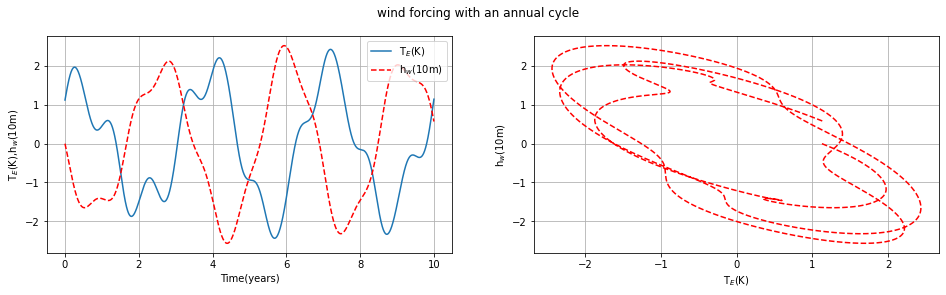

In [28]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax1.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
ax1.plot(xlim*2/12, np.array(h_arr)*15,'--',color='red',label="h$_w$(10m)")
ax1.set_xlabel("Time(years)")
ax1.set_ylabel("T$_E$(K),h$_w$(10m)")
ax1.legend(loc="upper right")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
ax2.set_xlabel("T$_E$(K)")
ax2.set_ylabel("h$_w$(10m)")
ax2.grid()
fig.suptitle("wind forcing with an annual cycle")

# Task E add random forcing 

In [29]:
import random
T=T0
h=h0
mu=0.6
b=b0*mu
R=gama * b - c
epsilon=0
f_ann=0.1
f_ran=1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]

In [30]:
for i in range(0, n ):
    w=(2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)

Text(0, 0.5, 'T$_E$, h$_w$')

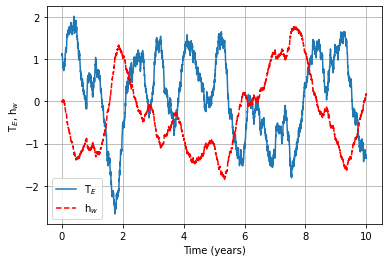

In [31]:
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$")
plt.legend()
plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T$_E$, h$_w$")

Text(0, 0.5, 'h$_w$(10m)')

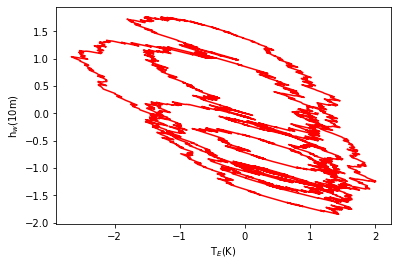

In [32]:
plt.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,color="red")
plt.xlabel("T$_E$(K)")
plt.ylabel("h$_w$(10m)")

Text(0.5, 0.98, 'annual wind forcing with white noise')

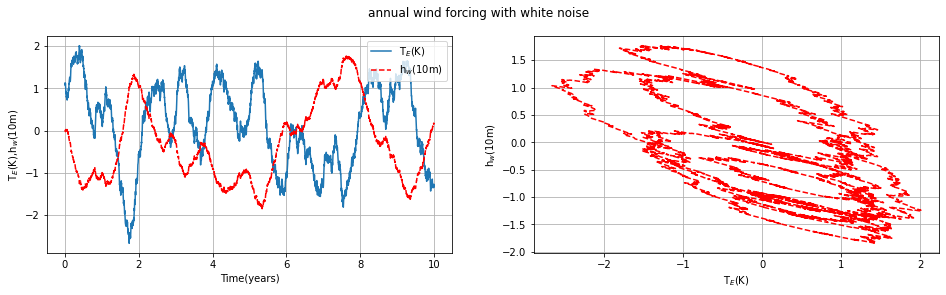

In [33]:
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax1.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
ax1.plot(xlim*2/12, np.array(h_arr)*15,'--',color='red',label="h$_w$(10m)")
ax1.set_xlabel("Time(years)")
ax1.set_ylabel("T$_E$(K),h$_w$(10m)")
ax1.legend(loc="upper right")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.array(T_arr)*7.5,np.array(h_arr)*15,'--',color='red')
ax2.set_xlabel("T$_E$(K)")
ax2.set_ylabel("h$_w$(10m)")
ax2.grid()
fig.suptitle('annual wind forcing with white noise')

Text(0, 0.5, 'T$_E$(K)')

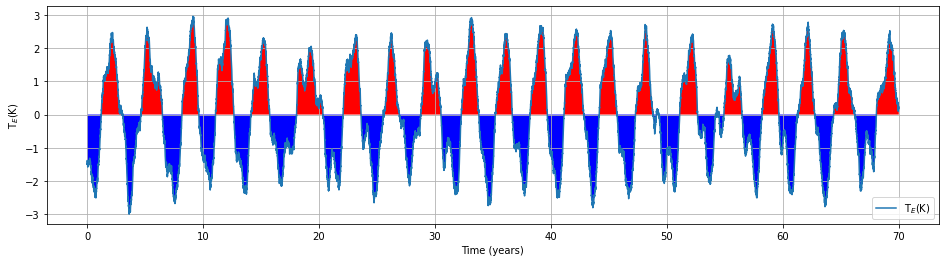

In [34]:
fig= plt.figure(figsize=(16,4))
time =120*7*30/60
n = int(time/dt)
xlim = np.linspace(0,time,n)
T=-1.5/7.5
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.5
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]

for i in range(0, n ):
    w=(2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$(K)")
x=xlim*2/12
y2=np.array(T_arr)*7.5
y1=0*y2
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
#plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")
plt.legend()
plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T$_E$(K)")

In [35]:
np.shape(xlim*2/12)

(25200,)

# Task F

Text(0.5, 1.0, 'ensemble with initial T increase from 0 to 7.5K')

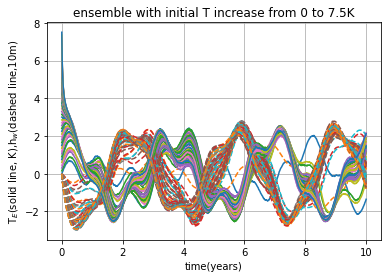

In [36]:
import random
T=T0
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional

time =120*30/60  #total time 240 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
T_arr, h_arr =[],[]
n = int(time/dt)# total number of time steps
xlim = np.linspace(0,time,n)


for j in range(51):
    T_arr, h_arr =[],[]
    T=(0.15*j)/7.5  # range from 0 to 7.5K
    #T= (1.125 + (2*random.random()-1)*0.5*1.125)/7.5#fluctuate +- 50% of 1.125K  # 1.125/7.5
    #h= (10 + (2*random.random()-1)*0.5*10)/150  #luctuate +- 50% of 10 meters   # 0
    h=0
    
    
    #T=1.125/7.5
    #h=(3*j)/150
    
    for i in range(0, n ):
        w=(2*random.random()-1)
        xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
        #print(xi)
        T_arr.append(T)
        h_arr.append(h)
        T,h = rungeKutta(T,h)
        
    plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
    plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$")
    
plt.xlabel("time(years)")   
plt.ylabel("T$_E$(solid line, K),h$_w$(dashed line,10m)")  
plt.grid()
plt.title("ensemble with initial T increase from 0 to 7.5K")


Text(0.5, 1.0, 'ensemble with initial h increase from 0 to 150m')

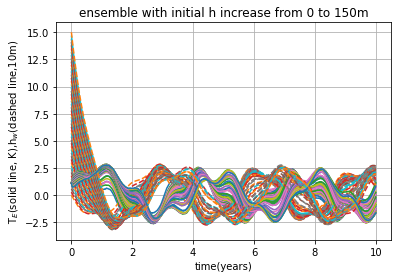

In [37]:
import random
T=T0
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional

time =120*30/60  #total time 240 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
T_arr, h_arr =[],[]
n = int(time/dt)# total number of time steps
xlim = np.linspace(0,time,n)


for j in range(51):
    T_arr, h_arr =[],[]
    #T=(0.15*j)/7.5  # range from 0 to 7.5K
    #T= (1.125 + (2*random.random()-1)*0.5*1.125)/7.5#fluctuate +- 50% of 1.125K  # 1.125/7.5
    #h= (10 + (2*random.random()-1)*0.5*10)/150  #luctuate +- 50% of 10 meters   # 0
    #h=0
    
    
    T=1.125/7.5
    h=(3*j)/150
    
    for i in range(0, n ):
        w=(2*random.random()-1)
        xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
        #print(xi)
        T_arr.append(T)
        h_arr.append(h)
        T,h = rungeKutta(T,h)
        
    plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T$_E$")
    plt.plot(xlim*2/12, np.array(h_arr)*15,'--',label="h$_w$")
plt.xlabel("time(years)")   
plt.ylabel("T$_E$(solid line, K),h$_w$(dashed line,10m)")  
plt.grid()  
plt.title("ensemble with initial h increase from 0 to 150m")
    

# Simplest ENSO model

#####  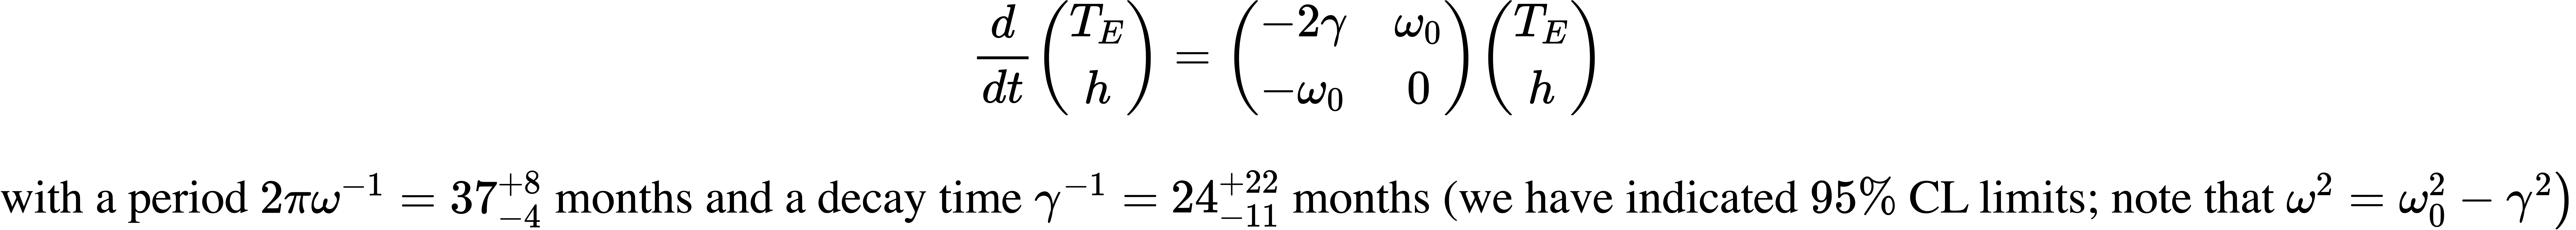

In [38]:
def sst(T, h):
    return (-2*gam*T +omega*h)
def thermo(T,h):
    return (-omega*T + 0*h)
def rungeKutta(T,h):
    "Apply Runge Kutta Formulas to find next value of T and h"
    k1 =  sst(T, h)
    kk1 =  thermo(T, h)
    
    k2 =  sst(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    kk2 = thermo(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    
    k3 =  sst(T + dt*0.5 * k2, h + dt*0.5 *kk2  )
    kk3 = thermo(T + dt*0.5 * k2, h + dt*0.5 * kk2 )
    
    k4 = sst(T + dt*k3, h + dt*kk3 )
    kk4 = thermo(T + dt*k3, h + dt*kk3 )
    # Update next value of T
    T = T + (1.0 / 6.0)*dt*(k1 + 2 * k2 + 2 * k3 + k4)
    # Update next value of h
    h = h + (1.0 / 6.0)*dt*(kk1 + 2 * kk2 + 2 * kk3 + kk4)
    return T,h

In [39]:
gam=1/24
omega=np.sqrt((2*np.pi/37)**2+gam**2)
omega

0.17485286252194235

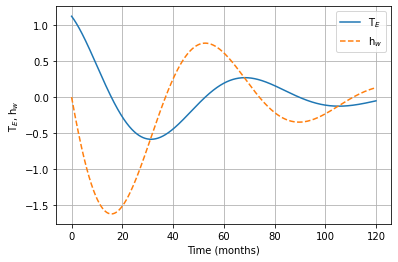

In [40]:
T0=1.125/7.5
h0=0
T= T0
h = h0
time =120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
plt.plot(xlim*2, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2, np.array(h_arr)*15,'--',label="h$_w$")
plt.xlabel("Time (months)")
plt.ylabel("T$_E$, h$_w$")
plt.legend()
plt.grid()


In [41]:
def sst(T, h):
    return (a11*T + a12*h)
def thermo(T,h):
    return (a21*T + a22*h)
def rungeKutta(T,h):
    "Apply Runge Kutta Formulas to find next value of T and h"
    k1 =  sst(T, h)
    kk1 =  thermo(T, h)
    
    k2 =  sst(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    kk2 = thermo(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    
    k3 =  sst(T + dt*0.5 * k2, h + dt*0.5 *kk2  )
    kk3 = thermo(T + dt*0.5 * k2, h + dt*0.5 * kk2 )
    
    k4 = sst(T + dt*k3, h + dt*kk3 )
    kk4 = thermo(T + dt*k3, h + dt*kk3 )
    # Update next value of T
    T = T + (1.0 / 6.0)*dt*(k1 + 2 * k2 + 2 * k3 + k4)
    # Update next value of h
    h = h + (1.0 / 6.0)*dt*(kk1 + 2 * kk2 + 2 * kk3 + kk4)
    return T,h

a11=-0.076/2
a12=0.021/2
a21=-1.4/2
a22=-0.008/2

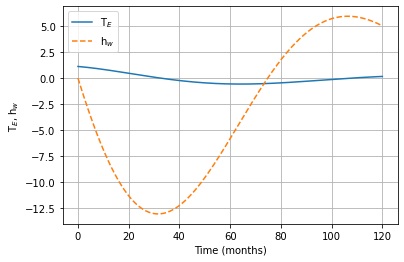

In [42]:
T0=1.125/7.5
h0=0
T= T0
h = h0

time =120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
plt.plot(xlim*2, np.array(T_arr)*7.5, label="T$_E$")
plt.plot(xlim*2, np.array(h_arr)*15,'--',label="h$_w$")
plt.xlabel("Time (months)")
plt.ylabel("T$_E$, h$_w$")
plt.legend()
plt.grid()
